<a href="https://colab.research.google.com/github/Dekem1/Study/blob/main/Shelling_Fedun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import random
import numpy as np


In [2]:
def neighbors(mass, row_number, column_number):
     return [[mass[i][j] if  i >= 0 and i < mass.shape[0] and j >= 0 and j < mass.shape[0] else None
                for j in range(column_number-1, column_number+2)]
                    for i in range(row_number-1, row_number+2)]

In [3]:
# Получение списка пустных клеток
def empty_mass(field):
  mass_of_emp1=[-1,-1]
  for i in range(field.shape[0]):
      for j in range(field.shape[0]):
      
        if field[i][j] == 0:
         newrow=[i,j]
         mass_of_emp1 = np.vstack([mass_of_emp1, newrow])
  mass_of_emp1 = np.delete(mass_of_emp1, (0), axis=0)
  return mass_of_emp1

In [4]:
def is_happy(i,j):
  
     
    if field[i][j] == 0:
      return 'None'
    else: 
      buffer = neighbors(field,i,j)
      counter=0
      for k in buffer: 
        for op in range(3):
          if k[op] == field[i][j] :
            counter +=1
      if counter >=3:
        return 'happy'
         
      else: return 'unhappy'

In [5]:
#Отрисовка
def otrisovka(field):


  ax = sns.heatmap(field, annot=True, fmt="d", cbar=None, xticklabels=False, yticklabels=False,cmap="crest",vmin=-1, vmax=1) # допишем xticklabels=False, yticklabels=False
  plt.title("Визуализация массива",fontsize=12)

  plt.show()

In [6]:
n=16
random.seed(9)

In [7]:
size=n**2
class_size=int(0.45*size)
none_size=size-2*class_size

In [8]:
red=np.full((class_size), 1)
blue=np.full((class_size), -1)
none=np.full((none_size), 0)

In [9]:
field=np.concatenate((red,blue,none))
random.shuffle(field)
field=field.reshape((n,n))

In [10]:
field

array([[-1,  0,  1,  1,  1, -1, -1, -1,  1, -1,  1,  1, -1, -1,  1,  0],
       [-1, -1, -1, -1,  1,  1,  1,  0,  0,  1,  1, -1, -1, -1,  1, -1],
       [-1, -1, -1, -1,  1,  1, -1,  1,  1,  0, -1, -1, -1,  1,  0,  0],
       [-1,  1, -1, -1,  1, -1,  1, -1,  1,  1, -1, -1, -1,  1, -1, -1],
       [-1,  1, -1,  1,  1, -1,  1,  1,  1, -1, -1, -1, -1,  1, -1,  1],
       [ 1,  1,  0, -1, -1, -1,  1, -1,  0, -1,  0, -1, -1,  1,  0,  1],
       [-1,  1,  1,  1,  1,  0,  1,  1, -1,  1,  1, -1,  1, -1, -1, -1],
       [ 1,  1,  1,  1,  1,  1,  0,  1,  1,  1, -1,  1,  0, -1, -1,  1],
       [ 1, -1,  1, -1,  0,  0, -1, -1,  1, -1,  0, -1, -1,  1, -1, -1],
       [ 1, -1, -1,  1, -1,  1, -1,  1, -1, -1,  1, -1,  1, -1,  0, -1],
       [ 1,  1, -1,  1, -1,  1, -1,  1, -1, -1, -1, -1, -1, -1,  0,  1],
       [-1,  1,  1,  1,  1, -1,  1, -1,  1,  1, -1, -1,  0, -1,  1,  0],
       [-1,  1,  1,  1,  0, -1,  1,  1,  1,  1,  1,  1,  0, -1,  1,  1],
       [-1,  0,  1, -1,  1,  1,  1, -1, -1,  1, -1,

Изначальное расположение клеток


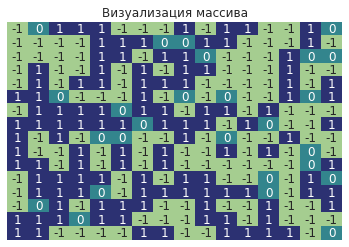

In [11]:
print('Изначальное расположение клеток')
otrisovka(field)

In [12]:
mass_of_empty=empty_mass(field)

In [13]:
counter=0
for i in range(field.shape[0]):
      for j in range(field.shape[0]):
        if is_happy(i,j) == 'unhappy':
          counter+=1
print(counter)

26


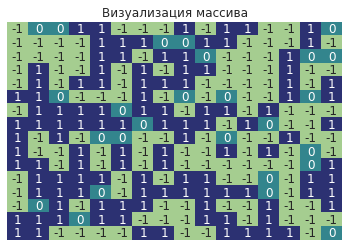

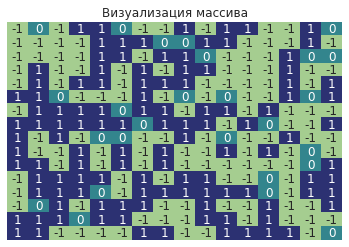

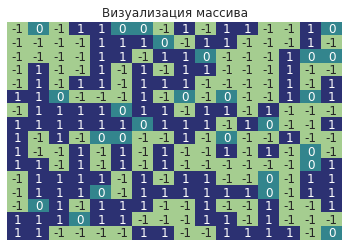

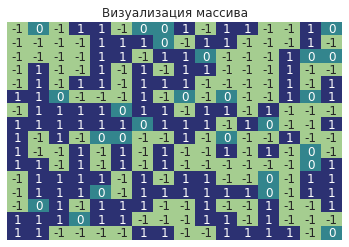

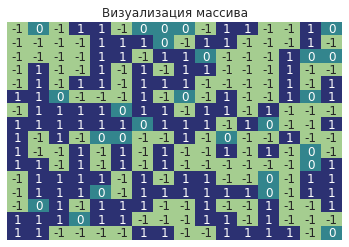

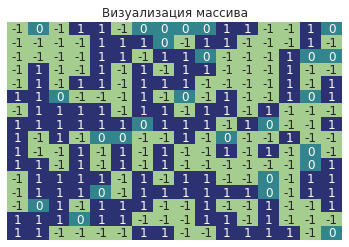

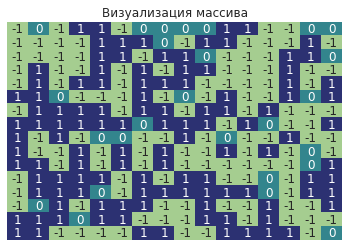

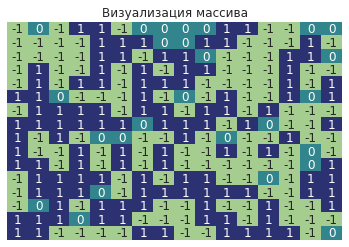

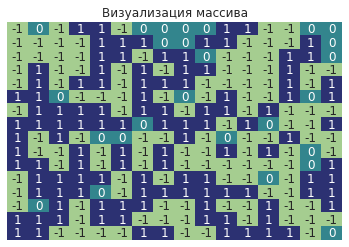

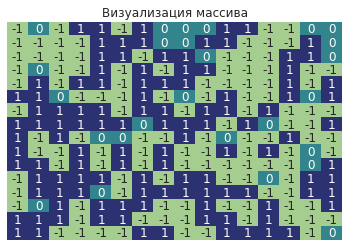

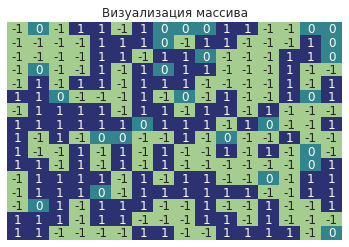

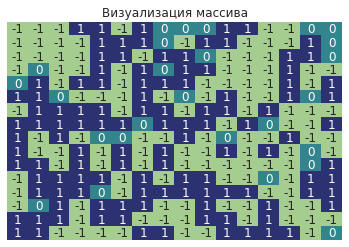

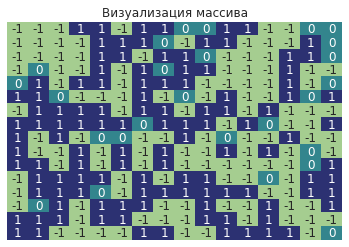

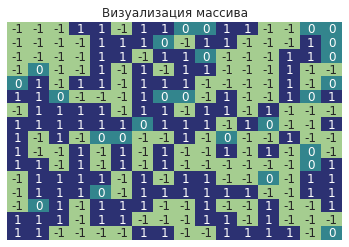

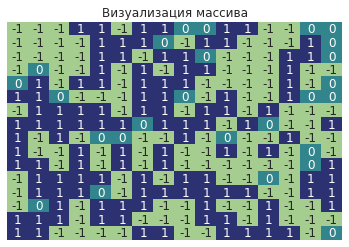

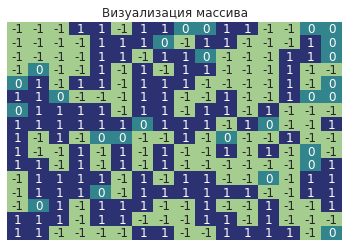

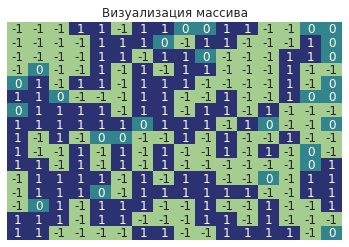

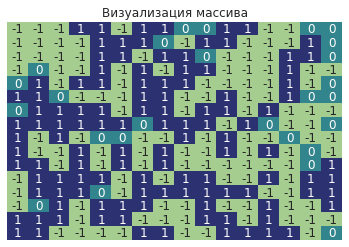

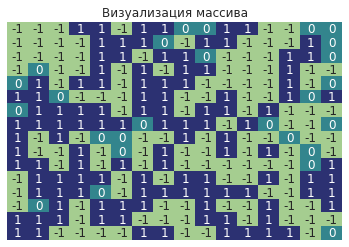

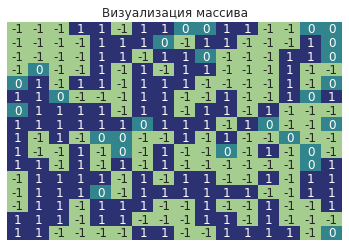

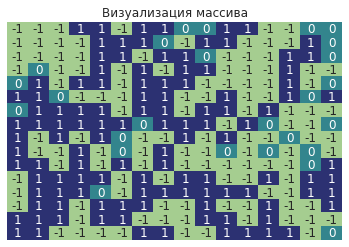

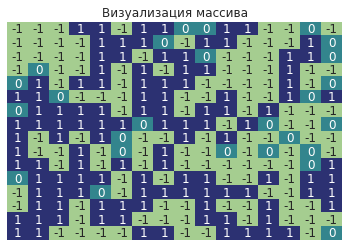

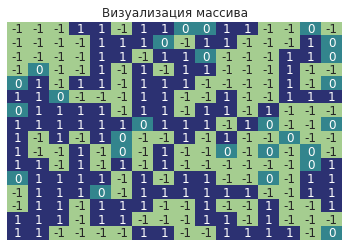

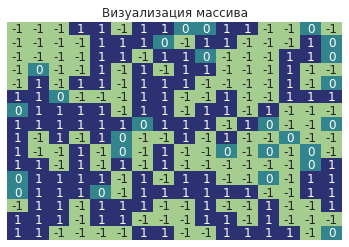

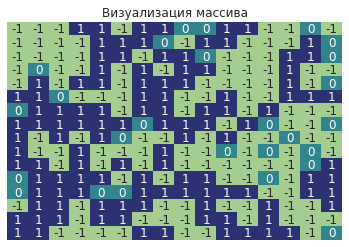

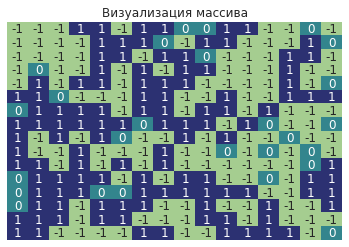

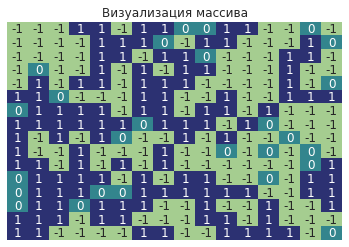

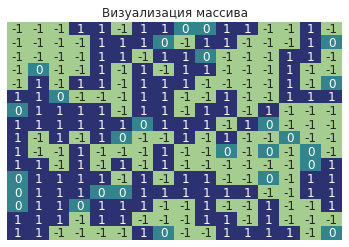

Конец 1 прогонки
Количество несчастливых: 8


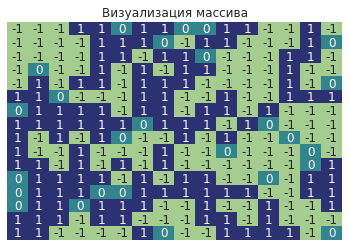

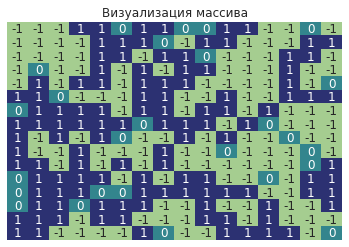

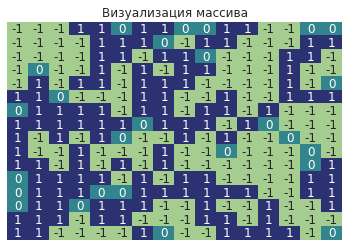

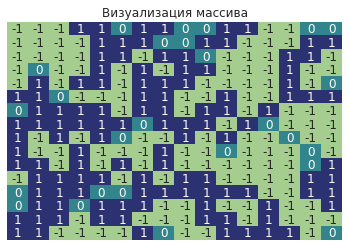

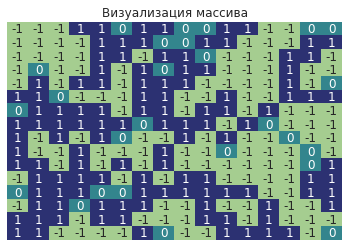

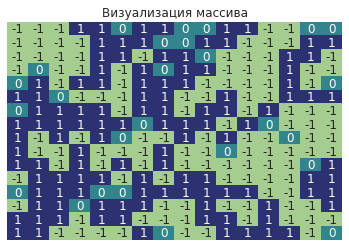

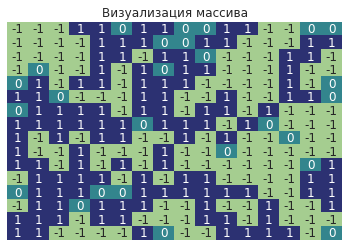

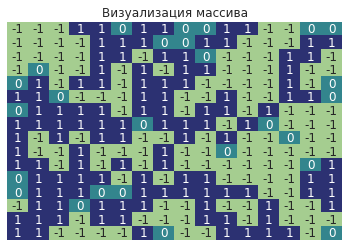

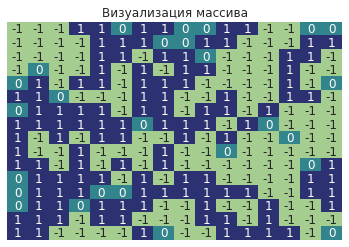

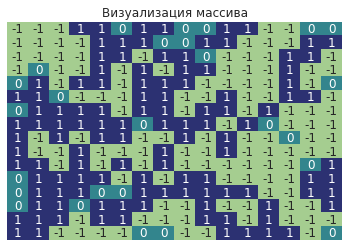

Конец 2 прогонки
Количество несчастливых: 2


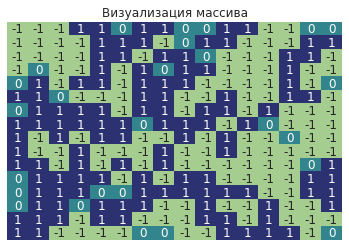

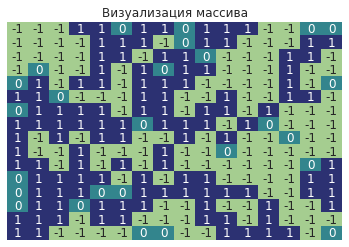

Конец 3 прогонки
Количество несчастливых: 1


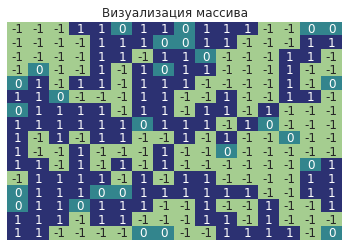

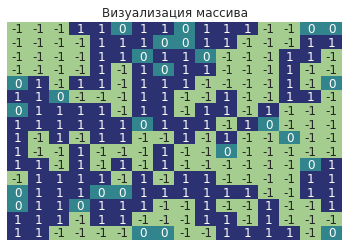

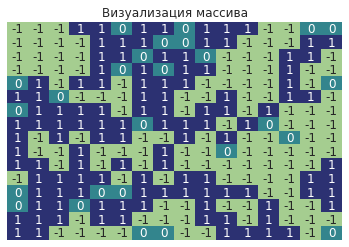

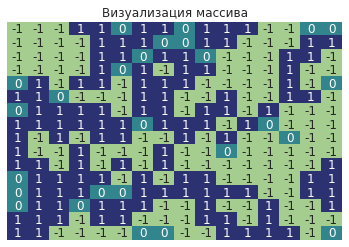

Конец 4 прогонки
Количество несчастливых: 1


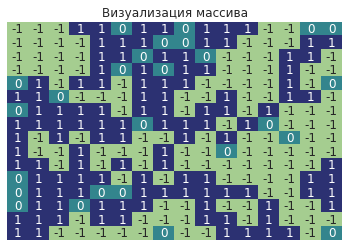

Конец 5 прогонки
Количество несчастливых: 0
Несчастливых не осталось!


In [14]:

schetcik=1
while counter !=0:

  for i in range(field.shape[0]):
      for j in range(field.shape[0]):
        
        if is_happy(i,j) == 'unhappy':
        
          number_of_empt=np.random.choice(range(mass_of_empty.shape[0]))
          choose_empty=mass_of_empty[number_of_empt]
          buff=choose_empty
        
          field[i][j], field[choose_empty[0]][choose_empty[1]] = field[choose_empty[0]][choose_empty[1]], field[i][j]
          mass_of_empty[number_of_empt]=[i,j]
          otrisovka(field)
          if is_happy(buff[0],buff[1]) == 'happy':
            print('Сменился')
  counter = 0    

  for ik in range(field.shape[0]):
      for jk in range(field.shape[0]):
        if is_happy(ik,jk) == 'unhappy':
          counter+=1
  print('Конец',schetcik, 'прогонки')
  schetcik+=1
  print('Количество несчастливых:',counter)

print('Несчастливых не осталось!')

      

        






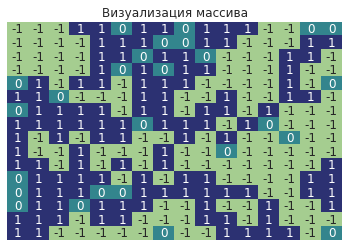

In [15]:
otrisovka(field)